Followed steps described at https://realpython.com/generative-adversarial-networks/

In [18]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [19]:
torch.manual_seed(111)

In [27]:
train_data_length = 1024

train_data = torch.zeros((train_data_length, 2))

train_data[:train_data_length//2, 0] = 2 * math.pi * torch.rand(train_data_length//2)

train_data[:train_data_length//2, 1] = torch.sin(train_data[:train_data_length//2, 0])

train_data[train_data_length//2:, 0] = 2 * math.pi * torch.rand(train_data_length//2)

train_data[train_data_length//2:, 1] = torch.cos(train_data[train_data_length//2:, 0])



train_labels = torch.zeros(train_data_length)

train_set = [

    (train_data[i], train_labels[i]) for i in range(train_data_length)

]

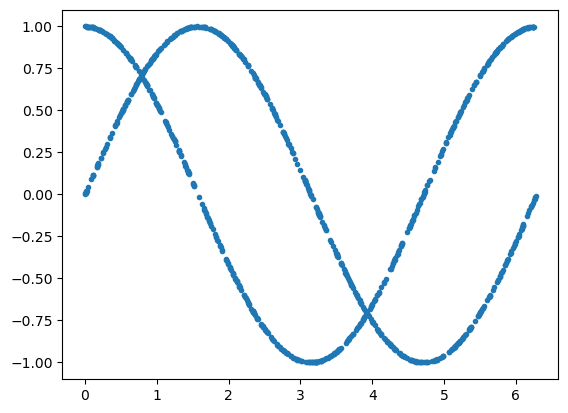

In [28]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [29]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [30]:
class Discriminator(nn.Module):

    def __init__(self):

        super().__init__()

        self.model = nn.Sequential(

            nn.Linear(2, 256),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(256, 128),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(128, 64),

            nn.ReLU(),

            nn.Dropout(0.3),

            nn.Linear(64, 1),

            nn.Sigmoid(),

        )


    def forward(self, x):

        output = self.model(x)

        return output
    
discriminator = Discriminator()

In [31]:
class Generator(nn.Module):

    def __init__(self):

        super().__init__()

        self.model = nn.Sequential(

            nn.Linear(2, 16),

            nn.ReLU(),

            nn.Linear(16, 32),

            nn.ReLU(),

            nn.Linear(32, 2),

        )


    def forward(self, x):

        output = self.model(x)

        return output


generator = Generator()

In [37]:
lr = 0.001

num_epochs = 600

loss_function = nn.BCELoss()

In [38]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)

optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [39]:
for epoch in range(num_epochs):

    for n, (real_samples, _) in enumerate(train_loader):

        # Data for training the discriminator

        real_samples_labels = torch.ones((batch_size, 1))

        latent_space_samples = torch.randn((batch_size, 2))

        generated_samples = generator(latent_space_samples)

        generated_samples_labels = torch.zeros((batch_size, 1))

        all_samples = torch.cat((real_samples, generated_samples))

        all_samples_labels = torch.cat(

            (real_samples_labels, generated_samples_labels)

        )


        # Training the discriminator

        discriminator.zero_grad()

        output_discriminator = discriminator(all_samples)

        loss_discriminator = loss_function(

            output_discriminator, all_samples_labels)

        loss_discriminator.backward()

        optimizer_discriminator.step()


        # Data for training the generator

        latent_space_samples = torch.randn((batch_size, 2))


        # Training the generator

        generator.zero_grad()

        generated_samples = generator(latent_space_samples)

        output_discriminator_generated = discriminator(generated_samples)

        loss_generator = loss_function(

            output_discriminator_generated, real_samples_labels

        )

        loss_generator.backward()

        optimizer_generator.step()


        # Show loss

        if epoch % 10 == 0 and n == batch_size - 1:

            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")

            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)
            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

Epoch: 0 Loss D.: 0.6608537435531616
Epoch: 0 Loss G.: 0.7785472869873047
Epoch: 10 Loss D.: 0.5722177028656006
Epoch: 10 Loss G.: 0.7909907698631287
Epoch: 20 Loss D.: 0.6781869530677795
Epoch: 20 Loss G.: 0.812312662601471
Epoch: 30 Loss D.: 0.6275609135627747
Epoch: 30 Loss G.: 0.8433165550231934
Epoch: 40 Loss D.: 0.7160072326660156
Epoch: 40 Loss G.: 0.7422263622283936
Epoch: 50 Loss D.: 0.5972674489021301
Epoch: 50 Loss G.: 0.8846544027328491
Epoch: 60 Loss D.: 0.6568715572357178
Epoch: 60 Loss G.: 1.1064141988754272
Epoch: 70 Loss D.: 0.6761386394500732
Epoch: 70 Loss G.: 0.856991171836853
Epoch: 80 Loss D.: 0.6061421632766724
Epoch: 80 Loss G.: 0.8486999869346619
Epoch: 90 Loss D.: 0.5733170509338379
Epoch: 90 Loss G.: 0.8691797256469727
Epoch: 100 Loss D.: 0.521920382976532
Epoch: 100 Loss G.: 0.9030356407165527
Epoch: 110 Loss D.: 0.607513427734375
Epoch: 110 Loss G.: 0.8902945518493652
Epoch: 120 Loss D.: 0.6663025617599487
Epoch: 120 Loss G.: 0.8176678419113159
Epoch: 130 L

In [40]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

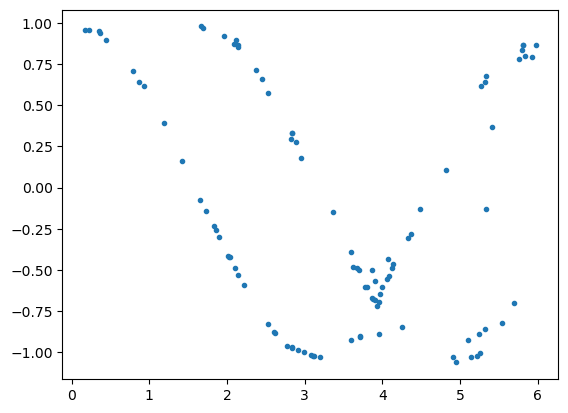

In [41]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")